In [1]:
# command to view figures in Jupyter notebook
%matplotlib widget 

# import plotting module 
import matplotlib.pyplot as plt 

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 18 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 20 # fontsize for figure titles
plt.rcParams['font.size'] = 16 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.6 # line width for plotting
plt.rcParams.update({'font.size': 14})

In [2]:
import math
import numpy as np
import scipy as sc
from scipy import signal
from scipy.signal import butter, lfilter, filtfilt, find_peaks
import pandas as pd
import statistics
import neurokit2 as nk
import seaborn as sns

In [3]:
Data_off = pd.read_csv('.csv')
Data_on = pd.read_csv('.csv')
Filename = 'SubEleven_FTTR'
Trial = 'SubEleven FTTR'
Sample_frequensy = 1260
Data_off

,Timestamp,Flexor carpi radialis,Extensor digitorum
0,2.000000,0.000012,-0.000014
1,2.000794,0.000006,-0.000013
2,2.001587,-0.000002,-0.000013
3,2.002381,-0.000009,-0.000015
4,2.003175,-0.000016,-0.000017
...,...,...,...
23936,20.996825,-0.000057,0.000188
23937,20.997619,-0.000093,0.000164
23938,20.998413,-0.000117,0.000136
23939,20.999206,-0.000125,0.000108


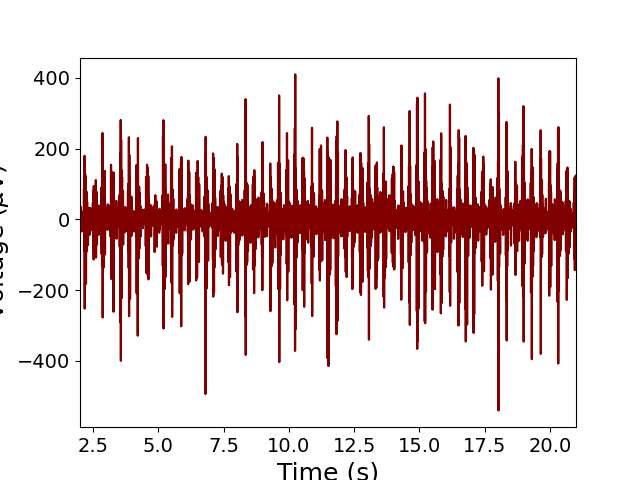

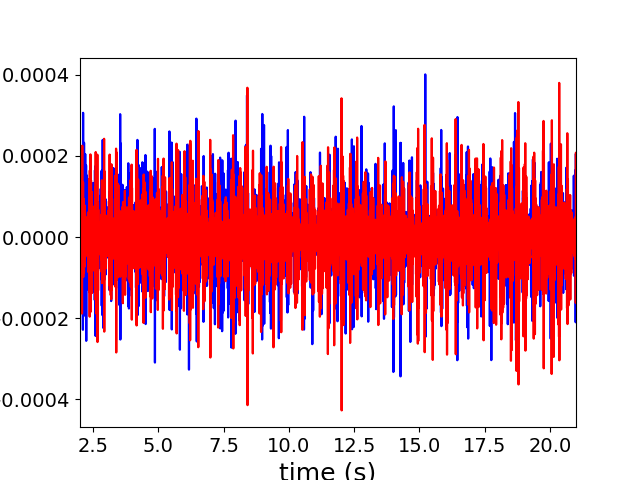

In [11]:
plt.figure()
plt.xlabel(r'Time (s)')
plt.ylabel(r'Voltage ($\mu$V)')
plt.plot(Data_off['Timestamp'], Data_off['Flexor carpi radialis']*(10**6), color='maroon')
plt.plot(Data_on['Timestamp'], Data_on['Flexor carpi radialis'], 'b')
plt.xlim(min(Data_off['Timestamp']), max(Data_off['Timestamp']));

plt.figure()
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(Data_off['Timestamp'], Data_off['Extensor digitorum']*(10**6), color='maroon')
plt.plot(Data_on['Timestamp'], Data_on['Extensor digitorum'], 'b')
plt.xlim(min(Data_off['Timestamp']), max(Data_off['Timestamp']));

In [5]:
# Выпрямление сигнала
absSignal_FCR_off = np.absolute(Data_off['Flexor carpi radialis'])

absSignal_FCR_on = np.absolute(Data_on['Flexor carpi radialis'])

absSignal_ED_off = np.absolute(Data_off['Extensor digitorum'])

absSignal_ED_on = np.absolute(Data_on['Extensor digitorum'])

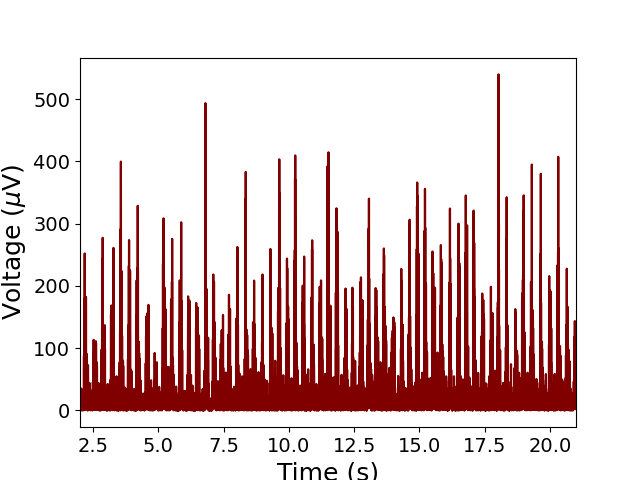

In [12]:
plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Voltage ($\mu$V)')
plt.plot(Data_off['Timestamp'], absSignal_FCR_off*(10**6), 'maroon')
plt.xlim(min(Data_off['Timestamp']),max(Data_off['Timestamp']));

In [7]:
lowp = 8
sfreq = Sample_frequensy
low_pass = lowp/sfreq
b, a = sc.signal.butter(4, low_pass, btype='lowpass')
datafrle_FCR_off = filtfilt(b, a, absSignal_FCR_off)

datafrle_FCR_on = filtfilt(b, a, absSignal_FCR_on)

datafrle_ED_off = filtfilt(b, a, absSignal_ED_off)

datafrle_ED_on = filtfilt(b, a, absSignal_ED_on)


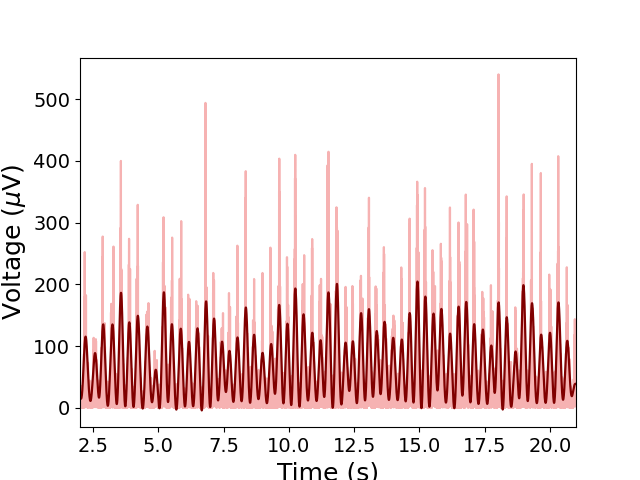

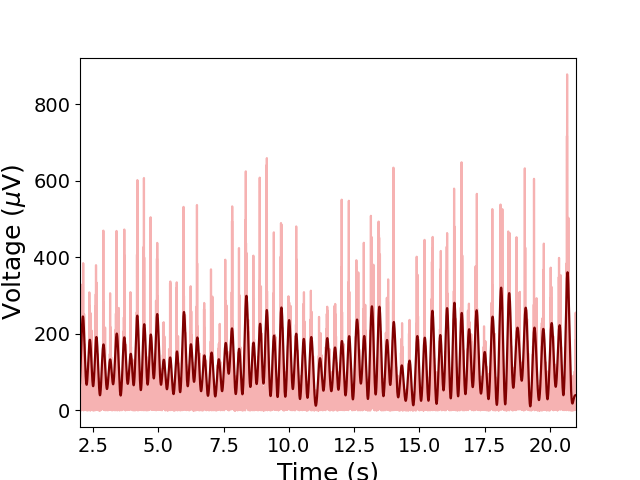

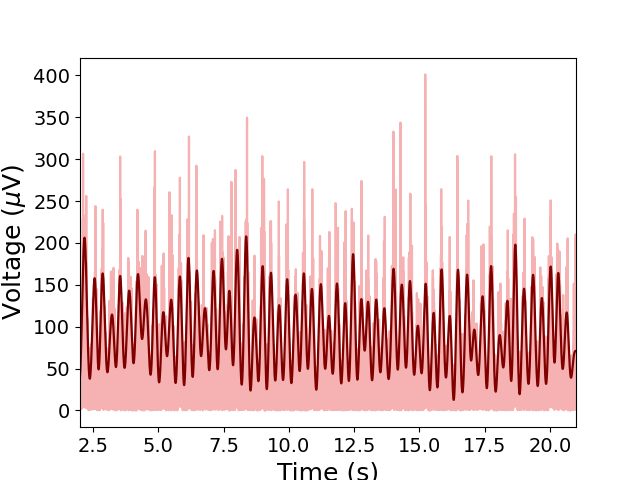

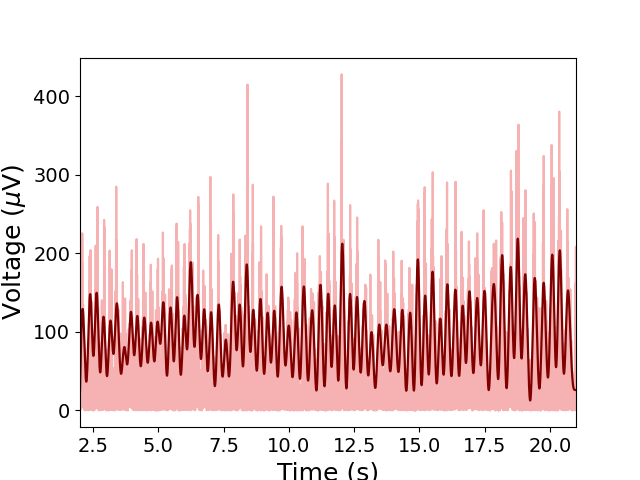

In [35]:
def figure_envelope(absSignal, datafrle):
    plt.figure()
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage ($\mu$V)')
    plt.plot(Data_off['Timestamp'], absSignal*(10**6), 'lightcoral', alpha=0.6)
    plt.plot(Data_off['Timestamp'], datafrle*(10**6)*2, 'maroon') # multiply envelope to see data fit
    plt.xlim(min(Data_off['Timestamp']),max(Data_off['Timestamp']));
    return

figure_envelope(absSignal_FCR_off, datafrle_FCR_off)
figure_envelope(absSignal_FCR_on, datafrle_FCR_on)
figure_envelope(absSignal_ED_off, datafrle_ED_off)
figure_envelope(absSignal_ED_on, datafrle_ED_on)


{'prominences': array([ 50.23795978,  36.05787659,  62.02526184,  64.44825059,
        91.46353848,  68.01588817,  73.8162593 ,  66.17154224,
        26.27787024,  94.12017343,  62.96174645,  62.96776681,
        52.11974177,  65.78331428,  85.55010485,  67.42512073,
        47.539335  ,  33.28345709,  51.61967954,  77.46752039,
        55.06956507,  37.44969045,  40.26990153,  81.03978544,
        64.51248567,  96.6296322 ,  70.16882838,  54.82144235,
        45.89786364,  92.49015003,  97.62204232,  39.07207271,
        50.07923102,  70.63114066,  75.61866134,  51.02544319,
        60.68063451,  50.27686063,  49.056272  ,  71.46191606,
       103.63516228,  90.30126868,  62.22623354,  79.24007604,
        55.85552249,  72.08332974,  86.00533872,  63.29746975,
        60.15393118,  38.32314707,  82.17438048,  72.5018515 ,
        37.8698018 ,  95.50191965,  79.19524312,  55.22167482,
        56.72486547,  78.83478364,  44.79073856]), 'left_bases': array([   49,   504,   504,  1342,  1

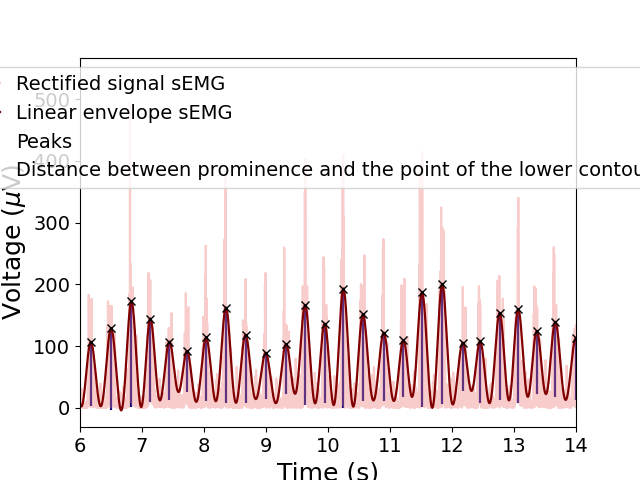

KeyError: 'width_heights'

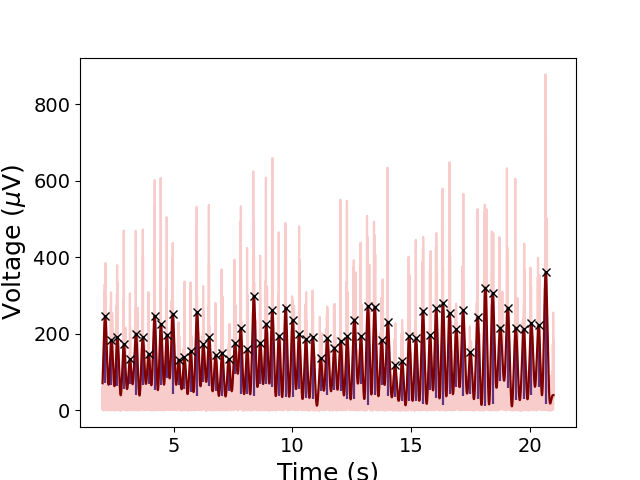

In [36]:
p1,prop1 = find_peaks(datafrle_FCR_off*(10**6), prominence = 4, width = 2)
print(prop1)

p2, prop2 = find_peaks(datafrle_FCR_on*(10**6), prominence = 1.5)

p3, prop3= find_peaks(datafrle_ED_off*(10**6), prominence = 1.6)

p4, prop4 = find_peaks(datafrle_ED_on*(10**6), prominence = 2)

peaks1=np.array(datafrle_FCR_off[p1])

peaks2=np.array(datafrle_FCR_on[p2])

peaks3=np.array(datafrle_ED_off[p3])

peaks4=np.array(datafrle_ED_on[p4])

def plot_peaks(data, p, label, absSignal,prop):
    plt.figure()
    
    plt.title(Trial + " " + label)
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage ($\mu$V)')
    plt.plot(Data_off['Timestamp'], absSignal*(10**6), 'lightcoral', alpha=0.4, label="Rectified signal sEMG")
    plt.plot(Data_on['Timestamp'], data*(10**6)*2, color='maroon', label='Linear envelope sEMG')
    plt.plot(Data_on['Timestamp'][p], data[p]*(10**6)*2, "x", color='black', label = 'Peaks')
    plt.vlines(x = Data_on['Timestamp'][p], ymin=data[p]*(10**6)*2 - prop["prominences"]*2,
           ymax = data[p]*(10**6)*2, color = "navy", label = 'Distance between prominence and the point of the lower contour line')
    plt.hlines(y=prop["width_heights"]*2, xmin=prop['left_ips']*2,
           xmax=prop['right_ips']*2, color = "navy")
    plt.xlim(min(Data_on['Timestamp']+4),max(Data_on['Timestamp'])-7)
    plt.legend()
    plt.show()
    return

plot_peaks(datafrle_FCR_off, p1, 'Flexor carpi radialis Off',absSignal_FCR_off, prop1)
plot_peaks(datafrle_FCR_on, p2, 'Flexor carpi radialis On',absSignal_FCR_on, prop2)
plot_peaks(datafrle_ED_off, p3, 'Extensor digitorum Off',absSignal_ED_off, prop3)
plot_peaks(datafrle_ED_on, p4, 'Extensor digitorum On',absSignal_ED_on, prop4)

In [ ]:
median_peaks1=statistics.median(peaks1)
print('Flexor carpi radialis Off', median_peaks1)

median_peaks2=statistics.median(peaks2)
print('Flexor carpi radialis On', median_peaks2)

median_peaks3=statistics.median(peaks3)
print('Extensor digitorum Off', median_peaks3)

median_peaks4=statistics.median(peaks4)
print('Extensor digitorum On', median_peaks4)

In [ ]:
print('Flexor carpi radialis Off', len(p1))

print('Flexor carpi radialis On', len(p2))

print('Extensor digitorum Off', len(p3))

print('Extensor digitorum On', len(p4))

In [ ]:
def vertical_mean_line(x, **kwargs):
    plt.axvline(np.mean(x), linestyle ="--", 
                color = kwargs.get("color", "r"))
    txkw = dict(size=13, color = kwargs.get("color", "r"))
    label_x_pos_adjustment = 0.01 # this needs customization based on your data
    label_y_pos_adjustment = 8 # this needs customization based on your data
    if np.mean(x) < 0.35: # this needs customization based on your data
        tx = "mean: {:.2f}\n(std: {:.2f})".format(np.mean(x),np.std(x))
        plt.text(np.mean(x) - 0.2, label_y_pos_adjustment, tx, **txkw)
    else:
        tx = "mean: {:.2f}\n(std: {:.2f})".format(np.mean(x),np.std(x))
        plt.text(np.mean(x) + label_x_pos_adjustment, label_y_pos_adjustment, tx, **txkw)

In [ ]:
def duration (p_off, p_on, channel):
    timestamp_off = []
    durs_off = []
    
    timestamp_on = []
    durs_on = []
    
    for i in p_off:
        timestamp_off.append(Data_on['Timestamp'][i])
    for i in range(1, len(timestamp_off)):
        durs_off.append(timestamp_off[i]-timestamp_off[i-1])
        
    for i in p_on:
        timestamp_on.append(Data_on['Timestamp'][i])
    for i in range(1, len(timestamp_on)):
        durs_on.append(timestamp_on[i]-timestamp_on[i-1])
    
    plt.figure()
    plt.title(Trial + ' Duration ' + channel)
    plt.xlabel('Duration (s)')
    plt.ylabel('Density')
    sns.kdeplot(durs_off, color='royalblue', cumulative=False, label='Off')
    sns.rugplot(durs_off, color='royalblue')
    vertical_mean_line(durs_off, color='royalblue')
    sns.kdeplot(durs_on, color='firebrick', cumulative=False, label='On')
    sns.rugplot(durs_on, color='firebrick')
    vertical_mean_line(durs_on, color='firebrick')
    plt.ylim(0, 10)
    plt.xlim(0, 1)
    plt.legend()
    plt.grid()
    
    
    return durs_off, durs_on
    """
    plt.plot(timestamp_off[1:], durs_off, label="Off")
    plt.plot(timestamp_on[1:], durs_on, label="On")
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()
    #print('Duration of', channel, durs)
    print(len(durs))
    #print(timestamp)
    """
dur_flex_off, dur_flex_on = duration(p1, p2, 'Flexor carpi radialis')

dur_ext_off, dur_ext_on = duration(p3, p4, 'Extensor digitorum')

In [ ]:
df1 = pd.DataFrame({'Flexor carpi radialis Off':dur_flex_off})
df2 = pd.DataFrame({'Flexor carpi radialis On':dur_flex_on})
df3 = pd.DataFrame({'Extensor digitorum Off':dur_ext_off})
df4 = pd.DataFrame({'Extensor digitorum On':dur_ext_on})

df_final_dur = pd.concat([df1,df2,df3,df4],axis=1)

df_final_dur.to_csv('C:/Users/wwwsn/Desktop/Durations/'+ Filename +'.csv',index=False)